In [16]:
import numpy as np
import pandas as pd

from IPython.core.display import display, HTML
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio


import seaborn as sns
from importlib import reload
import matplotlib.pyplot as plt
import matplotlib
import warnings



In [17]:
# Configure Jupyter Notebook
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', 500) 
pd.set_option('display.expand_frame_repr', False)
# pd.set_option('max_colwidth', -1)
display(HTML("<style>div.output_scroll { height: 35em; }</style>"))

reload(plt)
%matplotlib inline
%config InlineBackend.figure_format ='retina'

warnings.filterwarnings('ignore')

# configure plotly graph objects
pio.renderers.default = 'iframe'
# pio.renderers.default = 'vscode'

pio.templates["ck_template"] = go.layout.Template(
    layout_colorway = px.colors.sequential.Viridis, 
#     layout_hovermode = 'closest',
#     layout_hoverdistance = -1,
    layout_autosize=False,
    layout_width=800,
    layout_height=600,
    layout_font = dict(family="Calibri Light"),
    layout_title_font = dict(family="Calibri"),
    layout_hoverlabel_font = dict(family="Calibri Light"),
#     plot_bgcolor="white",
)
 
# pio.templates.default = 'seaborn+ck_template+gridon'
pio.templates.default = 'ck_template+gridon'
# pio.templates.default = 'seaborn+gridon'
# pio.templates


O primeiro é apenas observar os dados. Parece que existem dois índices: o índice e ProductID. Podemos deixar-los cair. Existe um Tipo que é categórico e o restante é numérico. As últimas cinco festas são todos modos de falha, portanto, não serão avaliadas neste notebook.

In [20]:
df = pd.read_csv('desafio_manutencao_preditiva_treino.csv')
df.head()


,udi,product_id,type,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min,failure_type
0,1,M14860,M,298.1,308.6,1551,42.8,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,No Failure
2,5,L47184,L,298.2,308.7,1408,40.0,9,No Failure
3,6,M14865,M,298.1,308.6,1425,41.9,11,No Failure
4,7,L47186,L,298.1,308.6,1558,42.4,14,No Failure


Não há valores ausentes aparentes, mas verifiquemos isso com cuidado para garantir

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6667 entries, 0 to 6666
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   udi                    6667 non-null   int64  
 1   product_id             6667 non-null   object 
 2   type                   6667 non-null   object 
 3   air_temperature_k      6667 non-null   float64
 4   process_temperature_k  6667 non-null   float64
 5   rotational_speed_rpm   6667 non-null   int64  
 6   torque_nm              6667 non-null   float64
 7   tool_wear_min          6667 non-null   int64  
 8   failure_type           6667 non-null   object 
dtypes: float64(3), int64(3), object(3)
memory usage: 468.9+ KB


In [22]:
df.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
udi,6667,NaN,NaN,NaN,4994.59,2896.13,1,2496.5,4983,7510.5,10000
product_id,6667,6667,M22667,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,6667,3,L,4022,NaN,NaN,NaN,NaN,NaN,NaN,NaN
air_temperature_k,6667,NaN,NaN,NaN,299.993,1.99471,295.3,298.3,300,301.5,304.5
process_temperature_k,6667,NaN,NaN,NaN,309.993,1.4881,305.7,308.8,310,311.1,313.8
rotational_speed_rpm,6667,NaN,NaN,NaN,1537.42,177.183,1168,1422.5,1503,1612,2886
torque_nm,6667,NaN,NaN,NaN,40.0585,9.9508,3.8,33.2,40.2,46.8,76.6
tool_wear_min,6667,NaN,NaN,NaN,108.098,63.3599,0,54,108,162,251
failure_type,6667,6,No Failure,6435,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df.replace("?",np.nan,inplace=True)



transformar todas as colunas em float para facilitar o processamento posterior

In [24]:
for column in df.columns:
    try:
        df[column]= df[column].astype(float)
    except:
         pass    


basta verificar a capacidade dos recursos numéricos. Nenhum ausente e em outliers aparentes

In [25]:
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.describe(include='all')

,udi,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min
count,6667.000000,6667.000000,6667.000000,6667.000000,6667.000000,6667.000000
mean,4994.589921,299.992515,309.992620,1537.419529,40.058512,108.098095
std,2896.125718,1.994710,1.488101,177.182908,9.950804,63.359915
min,1.000000,295.300000,305.700000,1168.000000,3.800000,0.000000
25%,2496.500000,298.300000,308.800000,1422.500000,33.200000,54.000000
50%,4983.000000,300.000000,310.000000,1503.000000,40.200000,108.000000
75%,7510.500000,301.500000,311.100000,1612.000000,46.800000,162.000000
max,10000.000000,304.500000,313.800000,2886.000000,76.600000,251.000000


Outra verificação se houver algum recurso ausente. Eu não vejo nenhum.


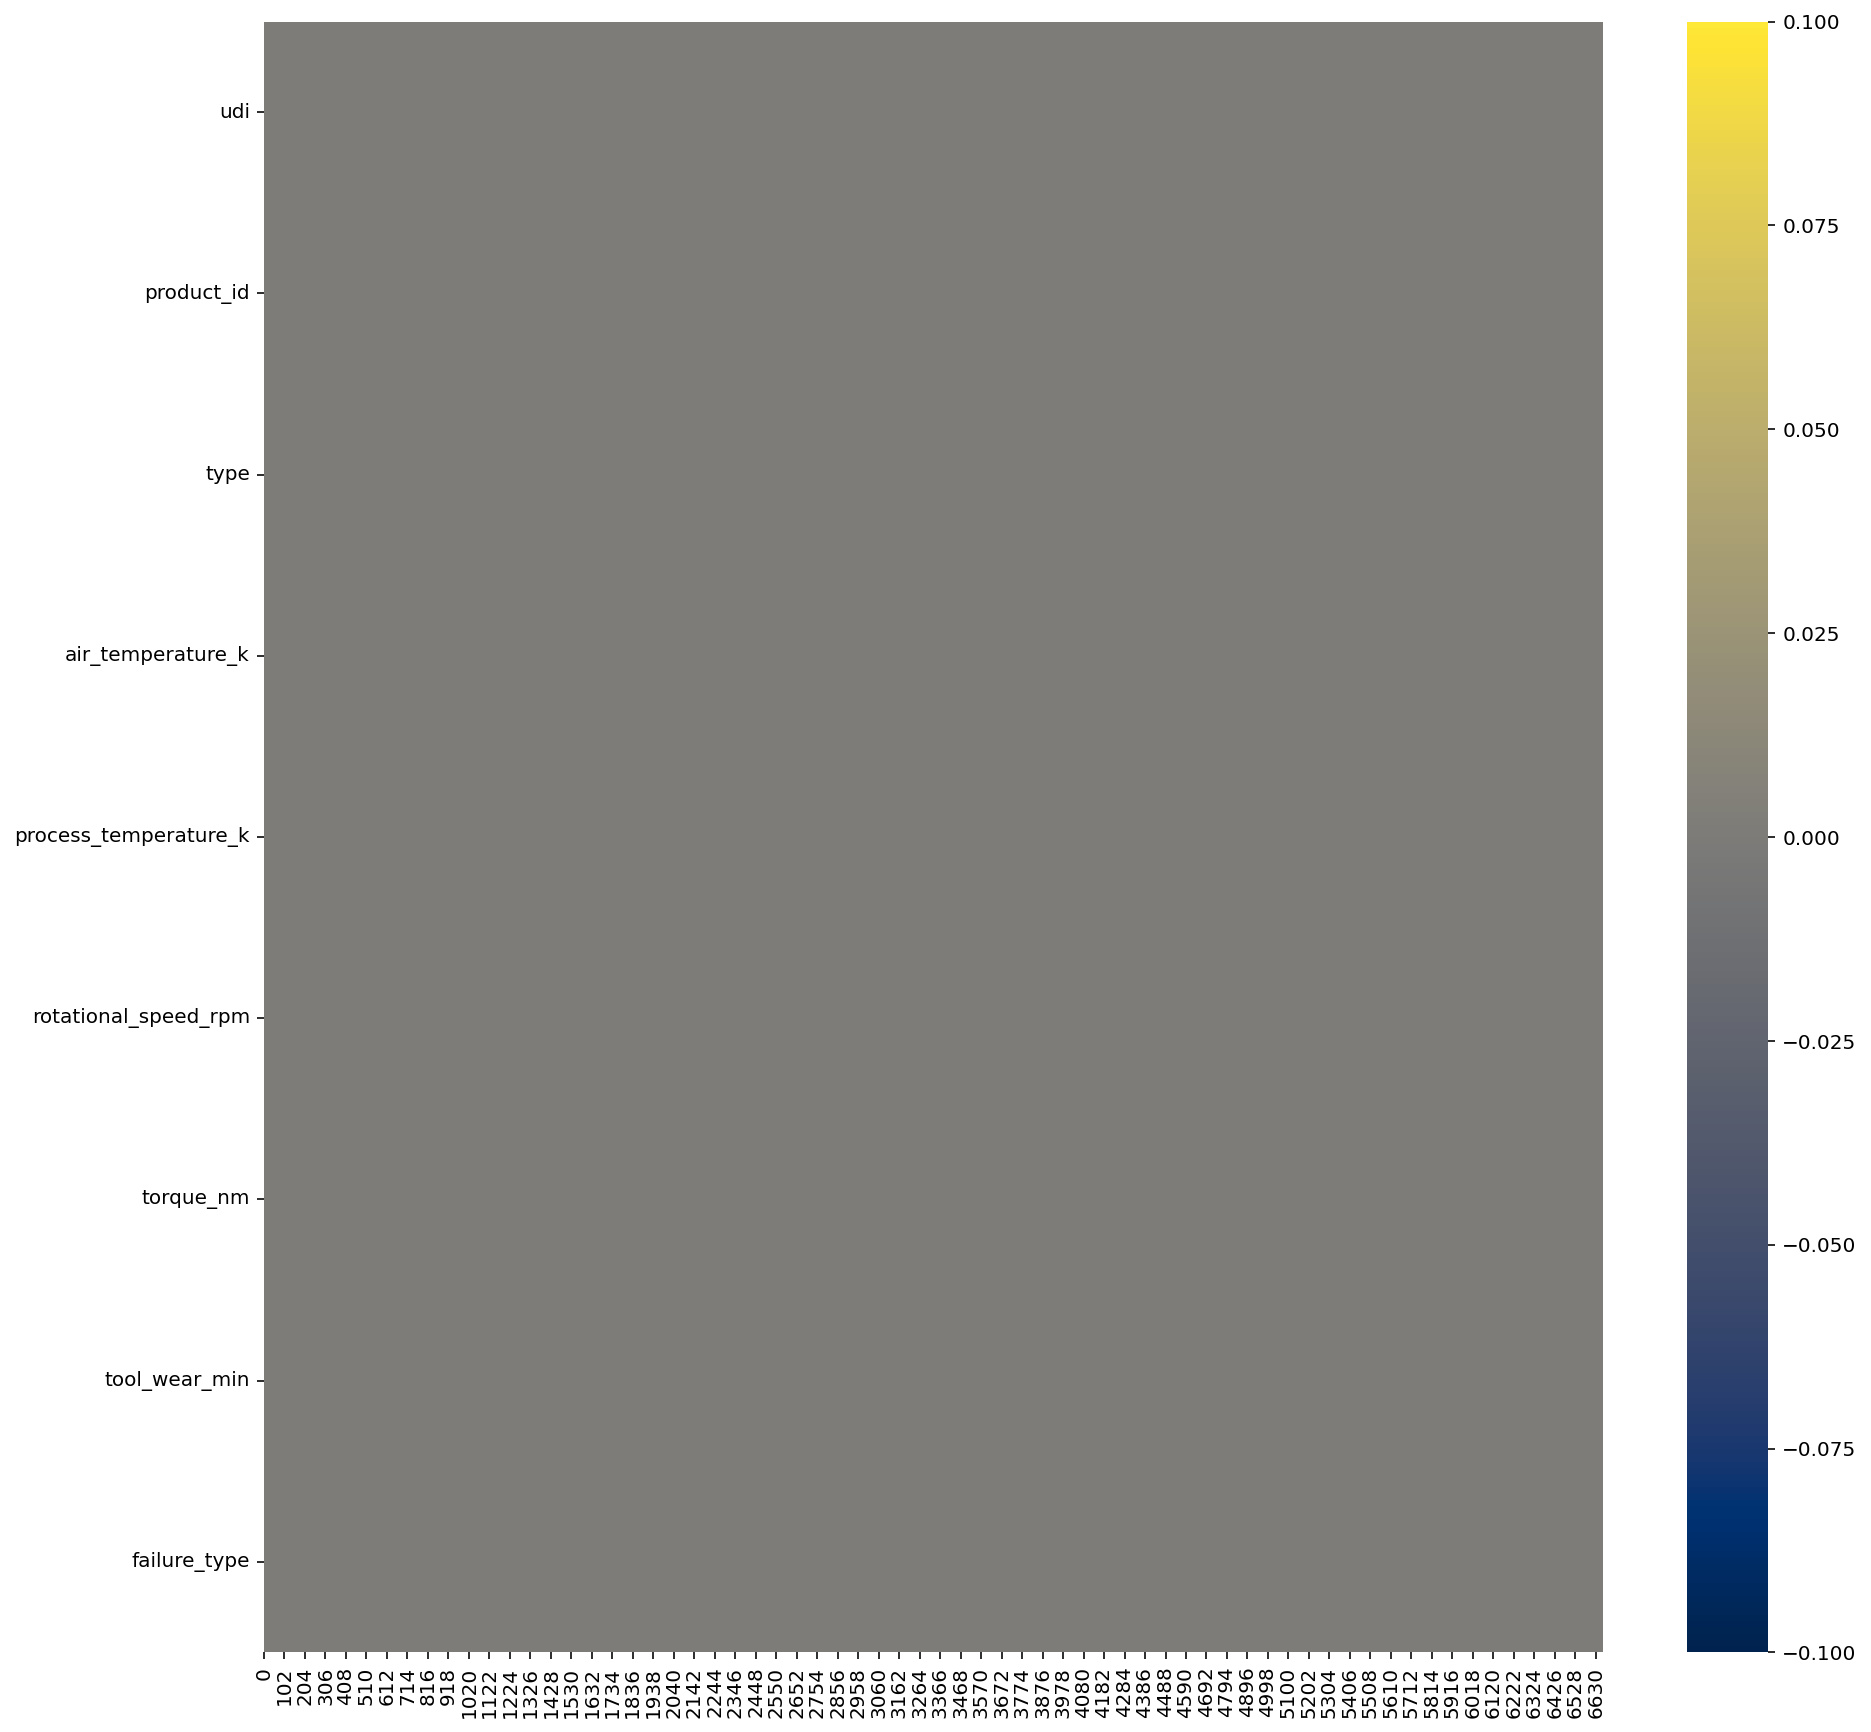

In [26]:
plt.figure(figsize=(15,15))
plot_kws={"s": 1}
sns.heatmap(df.isna().transpose(),
            cmap='cividis',
            linewidths=0.0,
           ).set_facecolor('white')

características existem fortemente correlacionadas, ou seja, processo e temperatura do ar. O torque e a velocidade de rotação também estão fortemente correlacionados. Podemos baixar uma das temperaturas, mas a diferença de torque para velocidade de rotação pode ser uma indicação de falha, então manteremos ambos.


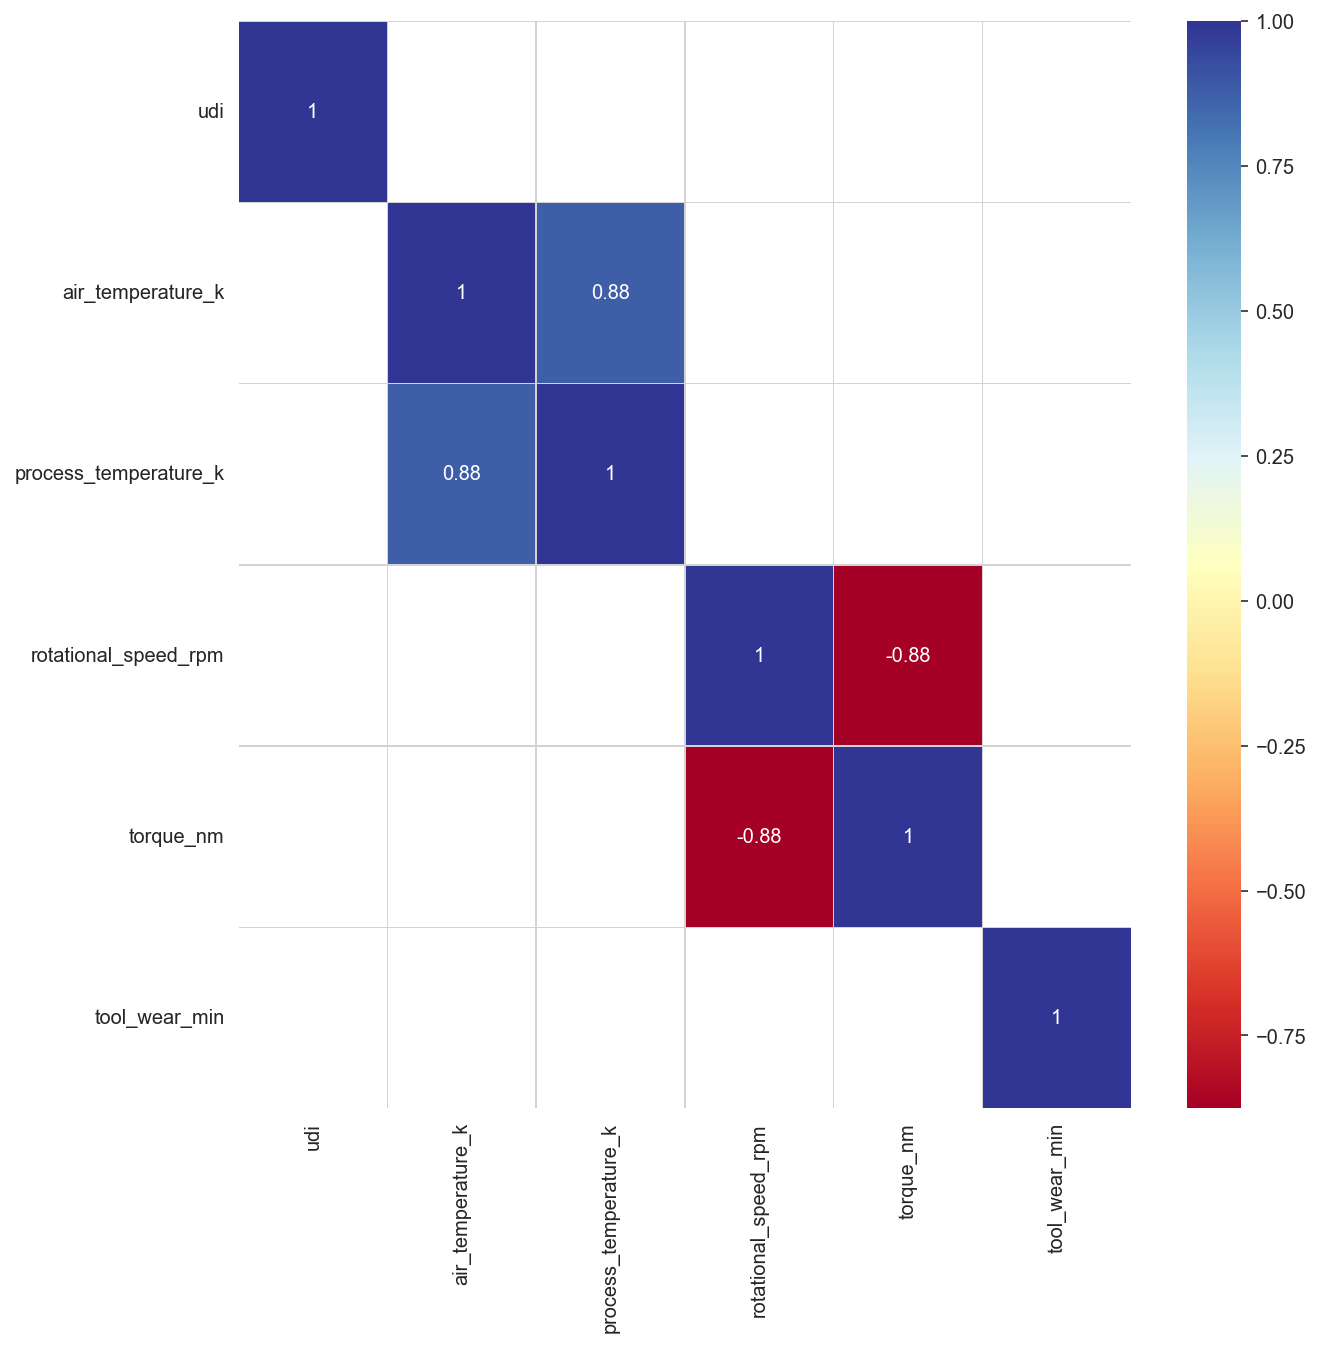

In [27]:
plt.figure(figsize=(10,10))
threshold = 0.80
sns.set_style("whitegrid", {"axes.facecolor": ".0"})
df_cluster2 = df.corr()
mask = df_cluster2.where((abs(df_cluster2) >= threshold)).isna()
plot_kws={"s": 1}
sns.heatmap(df_cluster2,
            cmap='RdYlBu',
            annot=True,
            mask=mask,
            linewidths=0.2, 
            linecolor='lightgrey').set_facecolor('white')

Elimine os índices, pois eles não têm poder preditivo


In [38]:
df.drop(['udi','product_id'],axis=1,inplace=True)


Elimine o tipo, pois ele domina fortemente o tipo = L

In [40]:
df.drop(['type'],axis=1,inplace=True)


Como características restantes


In [41]:
list(df)

['air_temperature_k',
 'process_temperature_k',
 'rotational_speed_rpm',
 'torque_nm',
 'tool_wear_min',
 'failure_type']

transformar informações categóricas em numéricos


In [43]:
df = pd.get_dummies(df,drop_first=True)
features = list(df.columns)
for feature in features:
    print(feature + " - " + str(len(df[df[feature].isna()])))

air_temperature_k - 0
process_temperature_k - 0
rotational_speed_rpm - 0
torque_nm - 0
tool_wear_min - 0
failure_type_No Failure - 0
failure_type_Overstrain Failure - 0
failure_type_Power Failure - 0
failure_type_Random Failures - 0
failure_type_Tool Wear Failure - 0



substituir os valores numéricos ausentes pela média


In [48]:
df_numeric.fillna(df_numeric.mean(),inplace=True)

for feature in features:
    try:
        df[feature].fillna(df[feature].mean(),inplace=True)
    except:
        try:
            df[feature].fillna(df[feature].mode(),inplace=True)
        except:
            pass

df.describe(include='all').T


,count,mean,std,min,25%,50%,75%,max
air_temperature_k,6667.0,299.992515,1.994710,295.3,298.3,300.0,301.5,304.5
process_temperature_k,6667.0,309.992620,1.488101,305.7,308.8,310.0,311.1,313.8
rotational_speed_rpm,6667.0,1537.419529,177.182908,1168.0,1422.5,1503.0,1612.0,2886.0
torque_nm,6667.0,40.058512,9.950804,3.8,33.2,40.2,46.8,76.6
tool_wear_min,6667.0,108.098095,63.359915,0.0,54.0,108.0,162.0,251.0
failure_type_No Failure,6667.0,0.965202,0.183282,0.0,1.0,1.0,1.0,1.0
failure_type_Overstrain Failure,6667.0,0.007800,0.087977,0.0,0.0,0.0,0.0,1.0
failure_type_Power Failure,6667.0,0.009450,0.096756,0.0,0.0,0.0,0.0,1.0
failure_type_Random Failures,6667.0,0.001800,0.042390,0.0,0.0,0.0,0.0,1.0
failure_type_Tool Wear Failure,6667.0,0.004500,0.066934,0.0,0.0,0.0,0.0,1.0



Realize um teste estatístico univariado para determinar os melhores recursos. O tipo de produto L domina fortemente.

In [54]:
from sklearn.feature_selection import SelectKBest, chi2

best_features = SelectKBest(score_func=chi2,k='all')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]
fit = best_features.fit(X,y)

df_scores=pd.DataFrame(fit.scores_)
df_col=pd.DataFrame(X.columns)

feature_score=pd.concat([df_col,df_scores],axis=1)
feature_score.columns=['feature','score']
feature_score.sort_values(by=['score'],ascending=True,inplace=True)

fig = go.Figure(go.Bar(
            x=feature_score['score'][0:21],
            y=feature_score['feature'][0:21],
            orientation='h'))

fig.update_layout(title="Top 20 Features",
                  height=1200,
                  showlegend=False,
                 )

fig.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [55]:
Selected_Features = []
import statsmodels.api as sm

def backward_regression(X, y, initial_list=[], threshold_out=0.5, verbose=True):
    """To select feature with Backward Stepwise Regression 

    Args:
        X -- features values
        y -- target variable
        initial_list -- features header
        threshold_out -- pvalue threshold of features to drop
        verbose -- true to produce lots of logging output

    Returns:
        list of selected features for modeling 
    """
    included = list(X.columns)
    while True:
        changed = False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()  # null if pvalues is empty
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print(f"worst_feature : {worst_feature}, {worst_pval} ")
        if not changed:
            break
    Selected_Features.append(included)
    print(f"\nSelected Features:\n{Selected_Features[0]}")


# Application of the backward regression function on our training data
backward_regression(X, y)

worst_feature : rotational_speed_rpm, 0.8568999994921127 

Selected Features:
['air_temperature_k', 'process_temperature_k', 'torque_nm', 'tool_wear_min', 'failure_type_No Failure', 'failure_type_Overstrain Failure', 'failure_type_Power Failure', 'failure_type_Random Failures']


In [56]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X.head()
feature_names = list(X.columns)
np.shape(X)

(6667, 9)

In [57]:
np.shape(X)

(6667, 9)

In [58]:
len(feature_names)


9

In [59]:
from imblearn.over_sampling import SMOTE, SVMSMOTE,RandomOverSampler
oversamp = RandomOverSampler(random_state=0)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 0,
                                                    stratify=y)

In [60]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [61]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score,roc_auc_score, plot_confusion_matrix,matthews_corrcoef
from sklearn.metrics import plot_confusion_matrix # will plot the confusion matrix


In [62]:
import time
model_performance = pd.DataFrame(columns=['Accuracy','Recall','Precision','F1-Score','MCC score','time to train','time to predict','total time'])

Classificação Logísticas

In [63]:
from sklearn.linear_model import LogisticRegression
start = time.time()
model = LogisticRegression().fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

In [64]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')
MCC = matthews_corrcoef(y_test, y_predictions)
# ROC_AUC = roc_auc_score(y_test, y_predictions, average='weighted')
ROC_AUC = roc_auc_score(y_test, model.predict_proba(X_test)[:,1], average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("MCC: "+ "{:.2%}".format(MCC))
print("ROC AUC score: "+ "{:.2%}".format(ROC_AUC))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Logistic'] = [accuracy, recall, precision, f1s,MCC,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 99.55%
Recall: 99.55%
Precision: 99.10%
F1-Score: 99.33%
MCC: 0.00%
ROC AUC score: 100.00%
time to train: 0.63 s
time to predict: 0.01 s
total: 0.63 s


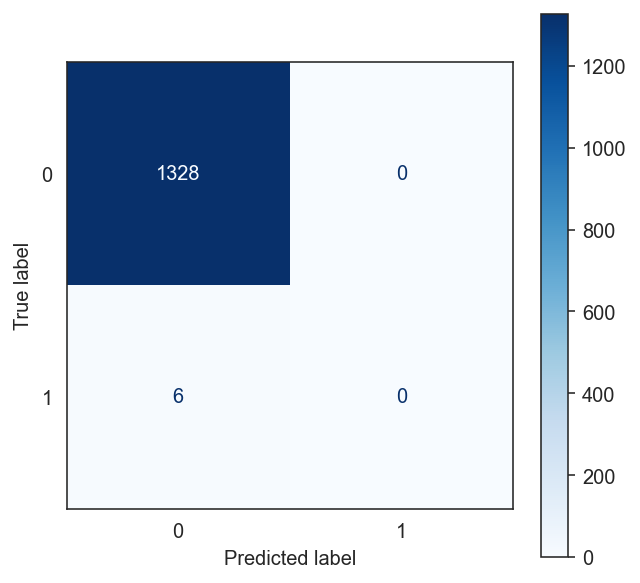

In [65]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

In [66]:
from sklearn.tree import DecisionTreeClassifier
start = time.time()
model = DecisionTreeClassifier().fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

In [67]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')
MCC = matthews_corrcoef(y_test, y_predictions)
# ROC_AUC = roc_auc_score(y_test, y_predictions, average='weighted')
ROC_AUC = roc_auc_score(y_test, model.predict_proba(X_test)[:,1], average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("MCC: "+ "{:.2%}".format(MCC))
print("ROC AUC score: "+ "{:.2%}".format(ROC_AUC))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Decision Tree'] = [accuracy, recall, precision, f1s,MCC,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 99.93%
Recall: 99.93%
Precision: 99.93%
F1-Score: 99.92%
MCC: 91.25%
ROC AUC score: 91.67%
time to train: 0.08 s
time to predict: 0.01 s
total: 0.09 s


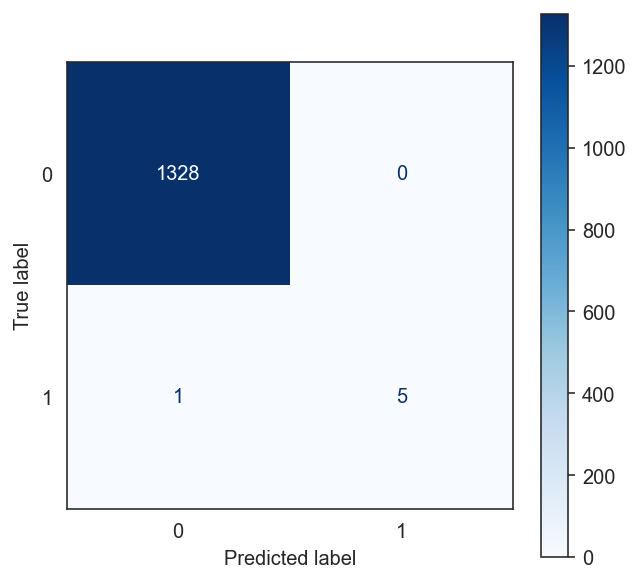

In [68]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

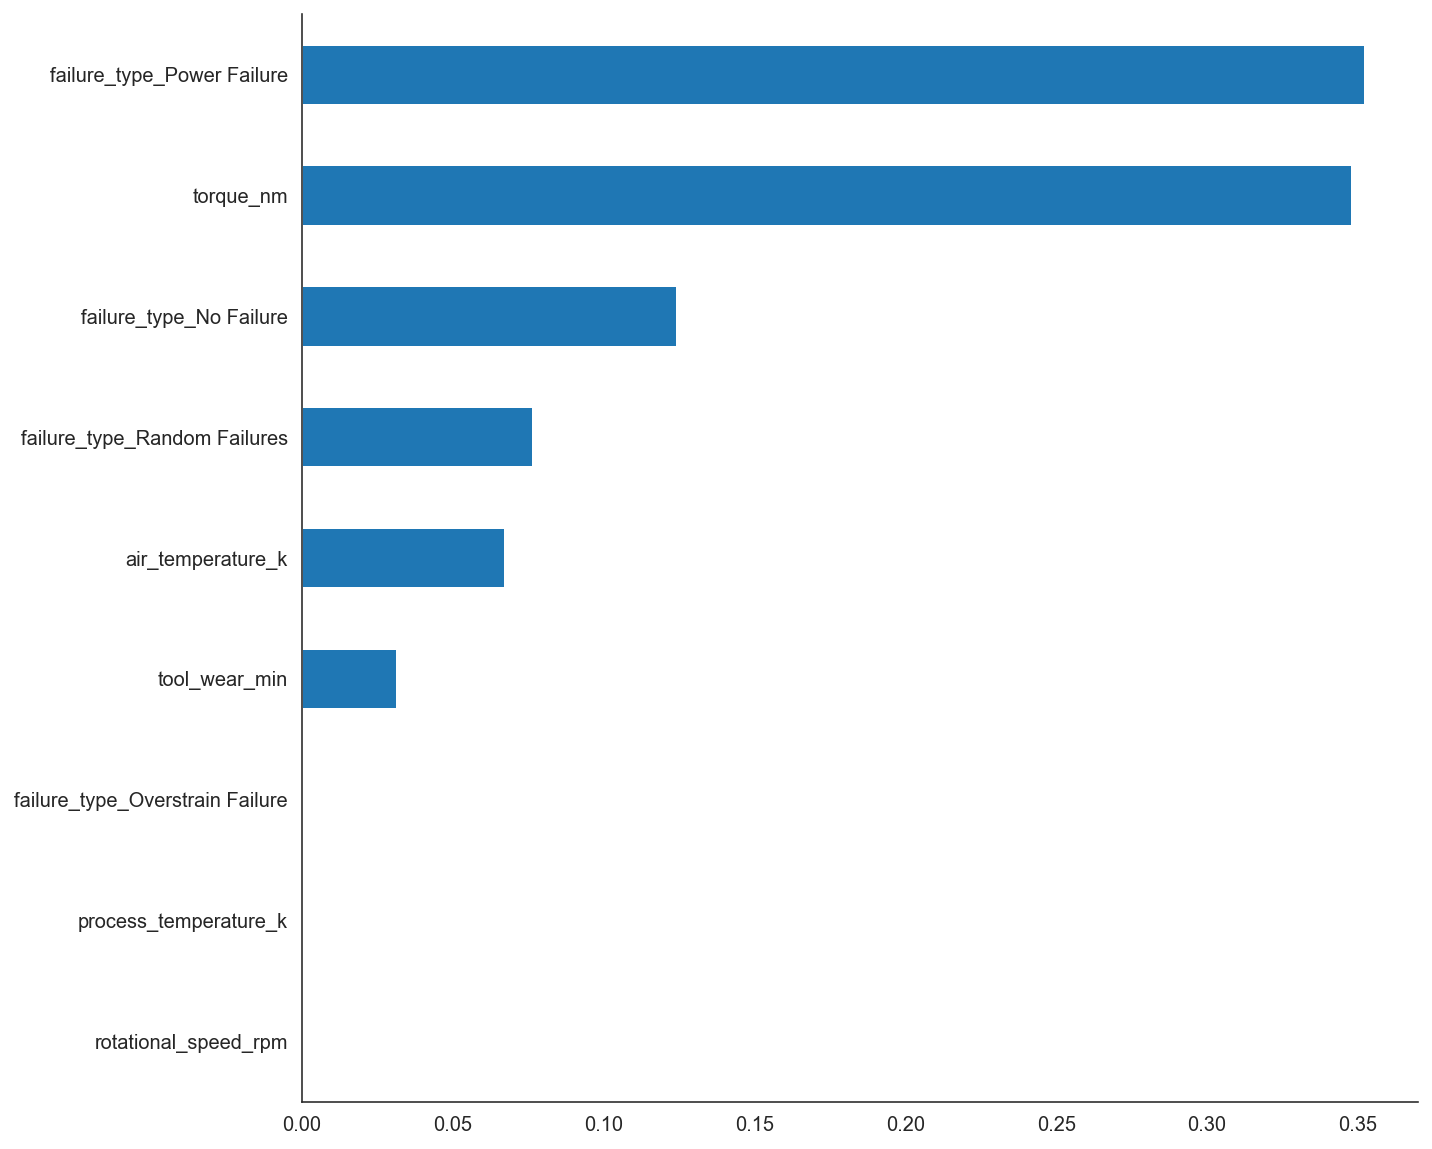

In [69]:
plt.rcParams['figure.figsize']=10,10
sns.set_style("white")
feat_importances = pd.Series(model.feature_importances_, index=feature_names)
feat_importances = feat_importances.groupby(level=0).mean()
feat_importances.nlargest(20).plot(kind='barh').invert_yaxis()
sns.despine()
plt.show()

Floresta aleatória

In [70]:
from sklearn.ensemble import RandomForestClassifier
start = time.time()
model = RandomForestClassifier(n_estimators = 100,n_jobs=-1,random_state=0,bootstrap=True,).fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

In [71]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')
MCC = matthews_corrcoef(y_test, y_predictions)
# ROC_AUC = roc_auc_score(y_test, y_predictions, average='weighted')
ROC_AUC = roc_auc_score(y_test, model.predict_proba(X_test)[:,1], average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("MCC: "+ "{:.2%}".format(MCC))
print("ROC AUC score: "+ "{:.2%}".format(ROC_AUC))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Random Forest'] = [accuracy, recall, precision, f1s,MCC,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 99.70%
Recall: 99.70%
Precision: 99.70%
F1-Score: 99.63%
MCC: 57.65%
ROC AUC score: 99.90%
time to train: 1.10 s
time to predict: 0.33 s
total: 1.44 s


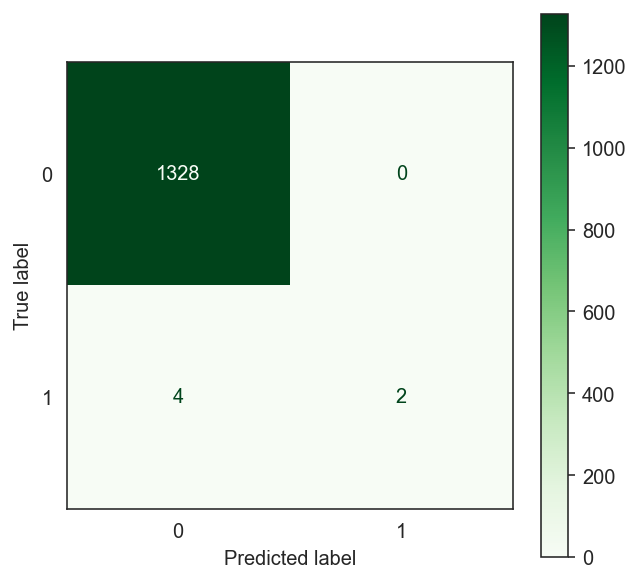

In [75]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Greens)  
plt.show()

Classificador de aumento de gradiente

In [76]:
from sklearn.ensemble import GradientBoostingClassifier
start = time.time()
model = GradientBoostingClassifier().fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

In [77]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')
MCC = matthews_corrcoef(y_test, y_predictions)
# ROC_AUC = roc_auc_score(y_test, y_predictions, average='weighted')
ROC_AUC = roc_auc_score(y_test, model.predict_proba(X_test)[:,1], average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("MCC: "+ "{:.2%}".format(MCC))
print("ROC AUC score: "+ "{:.2%}".format(ROC_AUC))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Gradient Boosting Classifier'] = [accuracy, recall, precision, f1s,MCC,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 99.78%
Recall: 99.78%
Precision: 99.78%
F1-Score: 99.74%
MCC: 70.63%
ROC AUC score: 99.90%
time to train: 2.27 s
time to predict: 0.20 s
total: 2.47 s


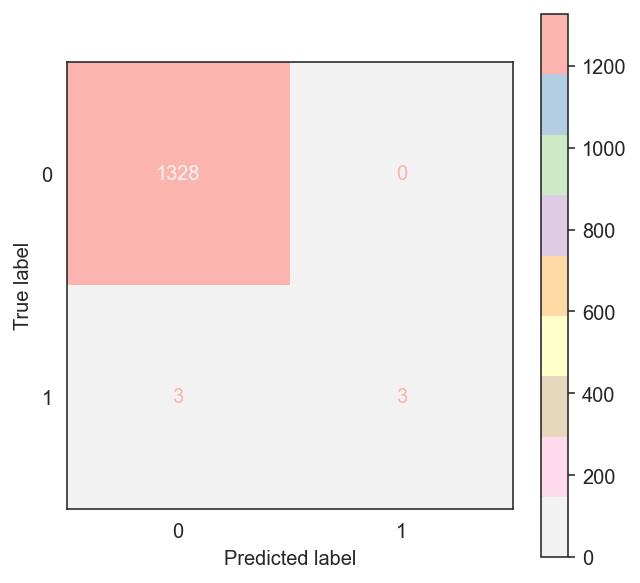

In [81]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Pastel1_r)  
plt.show()


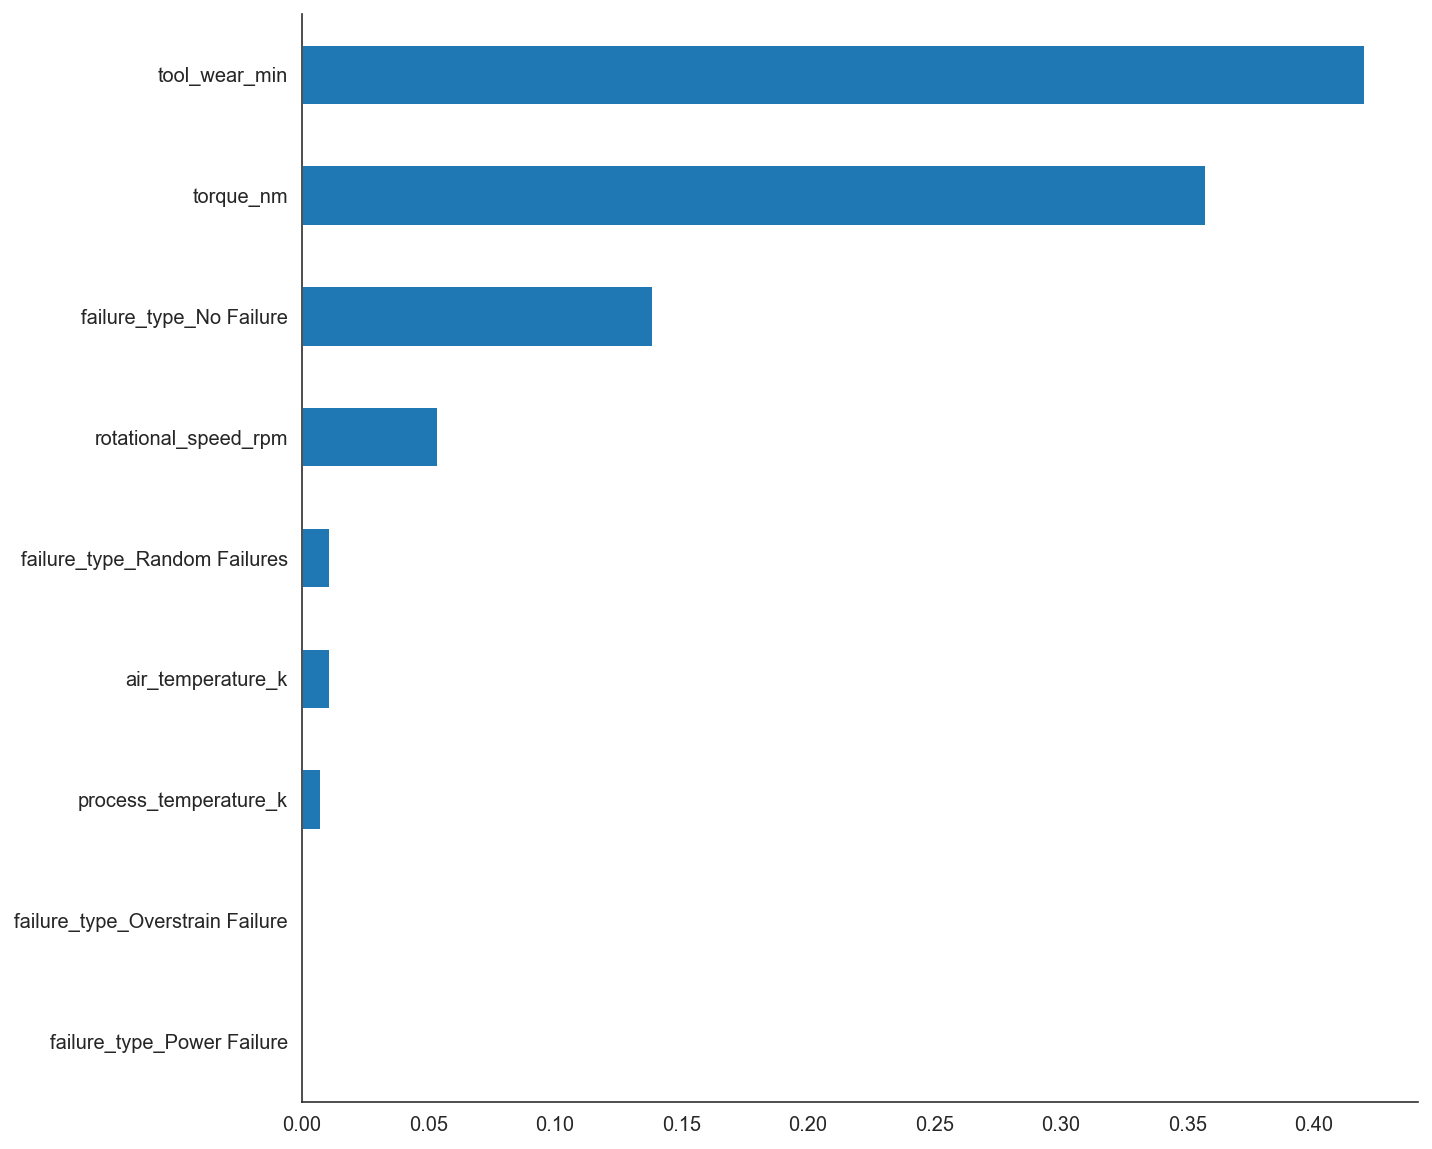

In [85]:
plt.rcParams['figure.figsize']=10,10
sns.set_style("white")
feat_importances = pd.Series(model.feature_importances_, index=feature_names)
feat_importances = feat_importances.groupby(level=0).mean()
feat_importances.nlargest(20).plot(kind='barh').invert_yaxis()
sns.despine()
plt.show()

Neural Network MLP

In [86]:
from sklearn.neural_network import MLPClassifier
start = time.time()
model = MLPClassifier(hidden_layer_sizes = (100,100,), 
                      activation='relu', 
                      solver='adam',
                      batch_size=2000,
                      verbose=0).fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

In [87]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')
MCC = matthews_corrcoef(y_test, y_predictions)
# ROC_AUC = roc_auc_score(y_test, y_predictions, average='weighted')
ROC_AUC = roc_auc_score(y_test, model.predict_proba(X_test)[:,1], average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("MCC: "+ "{:.2%}".format(MCC))
print("ROC AUC score: "+ "{:.2%}".format(ROC_AUC))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Neural Network MLP'] = [accuracy, recall, precision, f1s,MCC,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 99.85%
Recall: 99.85%
Precision: 99.85%
F1-Score: 99.84%
MCC: 81.59%
ROC AUC score: 100.00%
time to train: 25.98 s
time to predict: 0.02 s
total: 25.99 s


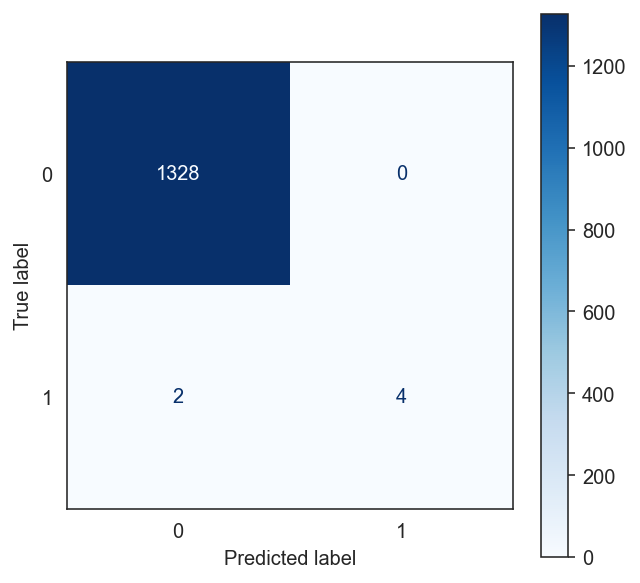

In [88]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

Evaluate

In [91]:
model_performance.fillna(.90,inplace=True)
model_performance.style.background_gradient(cmap='coolwarm').format({'Accuracy': '{:.2%}',
                                                                     'Precision': '{:.2%}',
                                                                     'Recall': '{:.2%}',
                                                                     'F1-Score': '{:.2%}',
                                                                     'MCC score': '{:.2%}',
                                                                     'time to train':'{:.1f}',
                                                                     'time to predict':'{:.1f}',
                                                                     'total time':'{:.1f}',
                                                                     })

,Accuracy,Recall,Precision,F1-Score,MCC score,time to train,time to predict,total time
Logistic,99.55%,99.55%,99.10%,99.33%,0.00%,0.6,0.0,0.6
Decision Tree,99.93%,99.93%,99.93%,99.92%,91.25%,0.1,0.0,0.1
Random Forest,99.70%,99.70%,99.70%,99.63%,57.65%,1.1,0.3,1.4
Gradient Boosting Classifier,99.78%,99.78%,99.78%,99.74%,70.63%,2.3,0.2,2.5
Neural Network MLP,99.85%,99.85%,99.85%,99.84%,81.59%,26.0,0.0,26.0
